**Gio Vanni Elbert Wisman - 0706022210034**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [37]:
#Import Library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report  
from sklearn.ensemble import GradientBoostingClassifier


## Load Dataset

In [49]:
url = "https://raw.githubusercontent.com/GioElbert/W7_Data-Mining_Gio-Vanni-Elbert-Wisman_0706022210034/refs/heads/main/bank.csv"
df = pd.read_csv(url, sep=';')  # Specify the separator

# Display the first few rows of the dataset
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [50]:
df['job'] = df['job'].replace({'admin.': 'administrative', 'management': 'administrative'})
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1906,49,blue-collar,divorced,primary,no,15,yes,no,unknown,27,may,550,7,-1,0,unknown,no
16,56,technician,married,secondary,no,4073,no,no,cellular,27,aug,239,5,-1,0,unknown,no
2448,25,student,single,tertiary,no,5,no,no,cellular,29,sep,138,1,-1,0,unknown,no
2171,26,technician,married,secondary,no,18,yes,yes,cellular,5,may,138,1,-1,0,unknown,no
2775,37,blue-collar,married,secondary,no,685,yes,no,unknown,6,jun,968,1,-1,0,unknown,no
824,39,technician,married,tertiary,no,794,no,no,telephone,2,feb,182,1,-1,0,unknown,no
501,58,administrative,married,secondary,no,2,yes,yes,telephone,25,jul,282,9,-1,0,unknown,no
2820,34,administrative,married,tertiary,no,1116,yes,no,cellular,25,jul,53,5,-1,0,unknown,no
45,34,administrative,single,tertiary,no,872,yes,no,unknown,7,may,105,2,-1,0,unknown,no
1103,55,blue-collar,married,unknown,no,1665,no,no,telephone,30,jul,89,2,-1,0,unknown,no


## Machine Learning

In [51]:
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']  

label_encoders = {}  
for col in columns_to_encode:  
    le = LabelEncoder()  
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,6,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,0,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,0,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [52]:
X = df.drop('y', axis=1)
y = df['y']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [54]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)  

y_pred = RF.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)  
print("Accuracy:", accuracy)

Accuracy: 0.8972375690607735


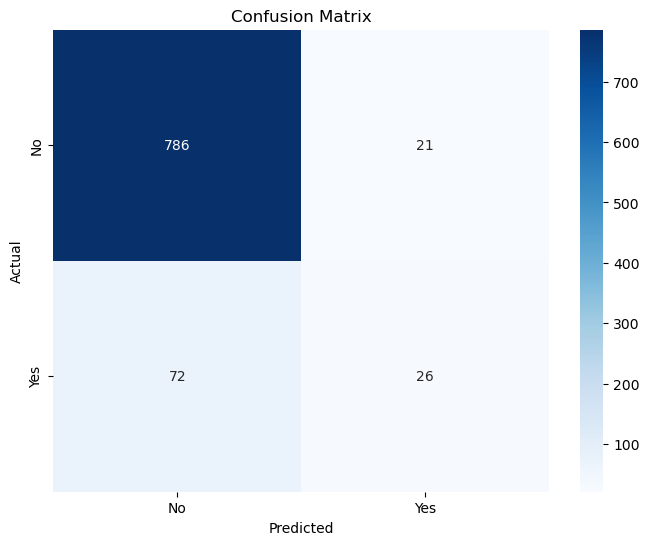

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix')  
plt.show()

In [69]:
class_report = classification_report(y_test, y_pred)  
print("Classification Report:\n", class_report)
print(f"Akurasi model: {accuracy:.2f}")  
print("Akurasi modelnya cukup tinggi persentasenya")

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.55      0.27      0.36        98

    accuracy                           0.90       905
   macro avg       0.73      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905

Akurasi model: 0.90
Akurasi modelnya cukup tinggi persentasenya


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [62]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_features=3)
GBC.fit(X_train, y_train)  

y_pred_gb = GBC.predict(X_test)

In [63]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)  
print("Accuracy (Gradient Boosting):", accuracy_gb)

Accuracy (Gradient Boosting): 0.8928176795580111


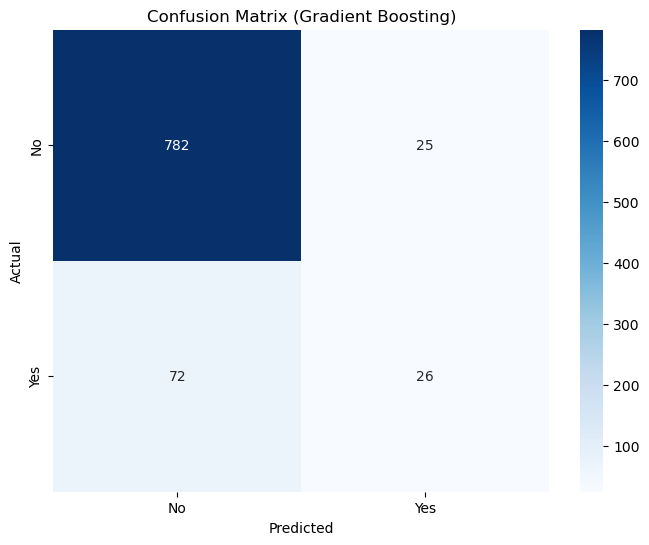

In [64]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)  

plt.figure(figsize=(8, 6))  
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix (Gradient Boosting)')  
plt.show()

In [71]:
class_report_gb = classification_report(y_test, y_pred_gb)  
print("Classification Report (Gradient Boosting):\n", class_report_gb)
print("Hasil dan Kesimpulan (Gradient Boosting):")  
print(f"Akurasi model: {accuracy_gb:.2f}")  
print("Hasilnya tidak beda jauh dengan random forest hanya beda sedikit untuk akurasi nya jadi dari kedua nya cukup akurat")

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.51      0.27      0.35        98

    accuracy                           0.89       905
   macro avg       0.71      0.62      0.65       905
weighted avg       0.87      0.89      0.88       905

Hasil dan Kesimpulan (Gradient Boosting):
Akurasi model: 0.89
Hasilnya tidak beda jauh dengan random forest hanya beda sedikit untuk akurasi nya jadi dari kedua nya cukup akurat
